In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # NOQA
import scipy.io as sio
import cv2
import h5py
import numpy as np

C:\Users\Chenyu\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
path ='D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseInput_fullsize/STO/'
raw_data = sio.loadmat(path + 'Simulation_noisy_STO_slice_5_1000FPS_fullsize.mat')
raw_data = raw_data['datacube']
print(raw_data.shape)

truth_data = np.load(path + 'Simulation_truth_STO_slice_5_1000FPS_fullsize.npy')
print(truth_data.shape)

path ='D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseOutput_fullsize/STO/'
denoised_data = sio.loadmat(path + 'Simulation_tensor_STO_slice_5_1000FPS_fullsize.mat')
denoised_data = denoised_data['est_HOOI']
print(denoised_data.shape)

noise = raw_data - truth_data
print(noise.shape)

(114, 114, 16384)
(114, 114, 16384)
(114, 114, 16384)
(114, 114, 16384)


(114, 114, 100)


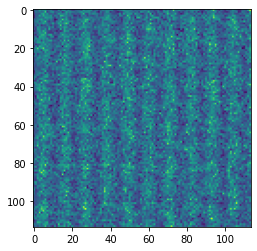

In [23]:
# data_subset = truth_data[:,:,10000:10100]
data_subset = raw_data[:,:,10000:10100]
# data_subset = raw_data[:,:,0:10] 
print(data_subset.shape)
plt.imshow(data_subset[:,:,1])

TypeError: Invalid shape (114, 114, 100) for image data

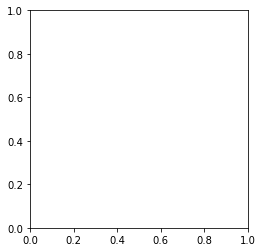

In [9]:
plt.imshow(np.squeeze(data_subset),cmap='gray')
plt.axis('off')

In [14]:
data_subset = (data_subset - np.amin(data_subset))/(np.amax(data_subset) - np.amin(data_subset))
np.amin(data_subset)

0.0

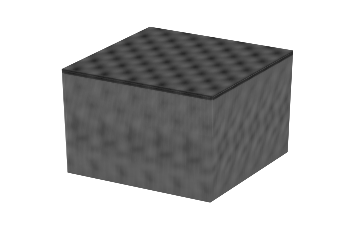

In [16]:
# Normalize the data to [0,1] in order to be used fro rgb argument

data_subset = (data_subset - np.amin(data_subset))/(np.amax(data_subset) - np.amin(data_subset))
data_subset = np.sqrt(data_subset)
# Generate coordinates
r, g, b = np.indices((data_subset.shape[0]+1,data_subset.shape[1]+1,data_subset.shape[2]+1))
colors = np.zeros(data_subset.shape + (3,))
colors[..., 0] = data_subset
colors[..., 1] = data_subset
colors[..., 2] = data_subset
# Fill all the voxels, thus use 3D array of ones
filled = np.ones(data_subset.shape)

# and plot everything
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(r, g, b, filled,
          facecolors=np.clip(2*colors - 0.5, 0, 1),
          edgecolors=colors,  # brighter
          linewidth=0.5)
ax.set(xlabel='r', ylabel='g', zlabel='b')
plt.axis('off')
ax.view_init(30,30)

plt.show()

In [14]:
decomposition = sio.loadmat(path + 'Simulation_noisy_STO_slice_5_1000FPS_fullsize_decomposition.mat')
U1 = decomposition['U1']
U2 = decomposition['U2']
U3 = decomposition['U3']
Core = decomposition['S']
print(U1.shape)
print(U2.shape)
print(U3.shape)

(114, 7)
(114, 7)
(16384, 30)


(-0.5, 29.5, 9.5, -0.5)

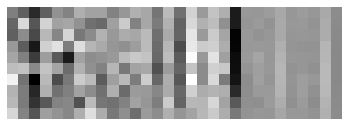

In [23]:
plt.imshow(U3[0:10,:],cmap='gray')
plt.axis('off')

(114, 114, 100)


(-0.5, 499.5, 113.5, -0.5)

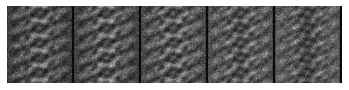

In [26]:
print(data_subset.shape)
plt.imshow(data_subset.reshape([114,114*100])[:,0:500],cmap='gray')
plt.axis('off')

Text(0.5, 0, 'Components')

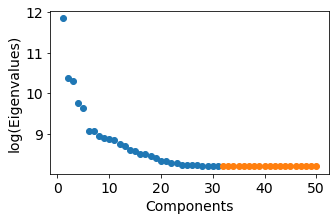

In [32]:
# Analysis eigenvalues
temp = sio.loadmat('D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseOutput_fullsize/SiDislocation/Simulation_noisy_SiDisl_slc5_1000FPS_eigenvalue.mat')

fig = plt.figure(figsize=(5,3))

e1 = temp['e1']
e1 = e1[::-1]
plt.plot(np.linspace(1,31,31),np.log(e1[0:31]),'o',linewidth='2')
plt.plot(np.linspace(32,50,19),np.log(e1[31:50]),'o',linewidth='2')
ax.tick_params(direction='in',labelsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.axvline(x=33,color='r',ls='--')"
plt.ylabel('log(Eigenvalues)',fontsize=14)
plt.xlabel('Components',fontsize=14)
# ax.text(5,8.4,'d',fontsize=20, color='black', fontweight='bold')
# plt.title('rank($\it{r_x})_{optimal}$=33',color='red',fontsize=20)